<a href="https://colab.research.google.com/github/MarialuizaLeao/NotebooksIC/blob/master/02_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perceptron e o problema de classificação


Agora que vimos um dos problemas do aprendizado supervisionado, o de regressão, vamos atacar o problema clássico da classificação.


In [ ]:
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X_original, y_original = make_blobs(n_features=2, n_samples=1000, random_state=42, centers=2)

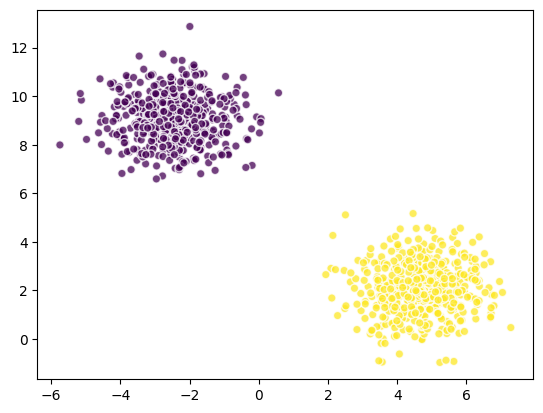

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_original[:,0], X_original[:,1], c=y_original, edgecolor='w', alpha=0.75)

Esse exemplo acima é o perceptron.
Um problema visivelmente simples: queremos classificar entre 0 e 1 nossos dados.

Este problema é simples pois nossos dados são linearmento separáveis, isto é, existe uma reta que separar os nossos dados.

Exemplo de dados linearmente e não linearmente separáveis:

<img src="https://i.ibb.co/gFbjLkm/Screenshot-2023-05-10-at-17-10-33.jpg" width = 100%/>



A forma como o perceptron foi abordado (e como abordaremos nesse notebook) é um primeiro passo na direção de uma rede neural.

1. Input: $\mathbf{x} = (x_1, x_2, x_3...)$ que no nosso caso se resume a $\mathbf{x} = (x_1, x_2)$.
2. Output: 0 ou 1

<img src="https://images.deepai.org/glossary-terms/perceptron-6168423.jpg" width = 70% />


Nosso input consiste nos pontos $(x_1, x_2)$. Multiplicaremos cada um por peso e somaremos esse valor, isto é: $\sum x_1 w_1 + x_2w_2 + w_0$, onde o $w_0$ faz o papel do bias na nossa análise.

Por fim, esse somatório pode ter qualquer valor. Para restringir a 0 ou 1, aplicamos uma função de ativação que, nesse caso, é a [step function](https://en.wikipedia.org/wiki/Heaviside_step_function).

Logo, temos que, se $(x_1 w_1 + x_2w_2 + w_0 \geq 0$) classificamos na classe 1. Caso contrário, classificamos na classe 0. Temos por fim, nossa abordagem.

Após nossa abordgem, precisamos de uma maneira para que o algoritmo "aprenda". No percepetron, o aprendizado do modelo se dá da seguinta maneira:

Se $W$ for nosso vetor de pesos, $\mathbf{W} = (w_0, w_1, w_2)$, atualizaremos o peso caso nossa predição seja errada:

$$ \mathbf{W}_{\text{new}} = \mathbf{W}_{\text{old}} + m(y-\hat{y}) \,\mathbf{x} $$

onde $(y-\hat{y})$ é a diferença entre ground truth e valor previsto e $m$ é o learning rate, isto é, a taxa com que nosso modelo aprenderá. $m$ pode ter qualquer valor entre (0,1].

Feito isso, temos um algoritmo para o perceptron:

In [ ]:
import torch
torch.manual_seed(0)

In [ ]:
X = torch.from_numpy(X_original)
y = torch.from_numpy(y_original)

Caso quisessemos usar exatamente a notação da imagem, precisaríamos incluir uma coluna de 1 no nosso vetor $x$, se tornando $(1,x_1,x_2)$. Mas, como é questão de notação e mais para frente veremos que o bias está incluso por natureza nas nossas camadas, incluirei ele como uma constante.

In [ ]:
def perceptron(X: torch.tensor, y: torch.tensor) -> torch.tensor:
    W = torch.rand((1,2), dtype = torch.float64)
    bias = torch.rand(1, dtype = torch.float64)
    lr = 0.5
    change = True
    while change:
        change = False
        for i in range(len(y)):
            yi = y[i]
            previsao = W@X[i] + bias
            previsao = 1 if previsao > 0 else 0 ## Essa será nossa função de ativação, a step function.
            if previsao != yi:
                W = W + lr*(yi-previsao)*X[i].view(1,2)
                change = True
    return W, bias


In [ ]:
pesos, bias = perceptron(X,y)

In [ ]:
pesos = pesos.numpy()
bias = bias.numpy();

In [ ]:
pesos, bias

(array([[ 3.59020428, -1.13313081]]), array([0.55824308]))

In [ ]:
x_plot = np.linspace(X[:,0].min(), X[:,0].max(), 64)

$ ax + by + c = 0$ é a equação da reta, portanto:

$$ y = \frac{-c - ax}{b}$$

In [ ]:
y_plot = (-bias - pesos[0,0]*x_plot)/pesos[0,1]

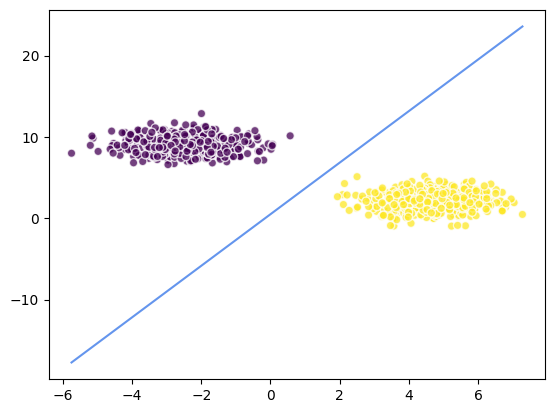

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_original[:,0], X_original[:,1], c=y_original, edgecolor='w', alpha=0.75)
ax.plot(x_plot, y_plot, color = 'cornflowerblue');

Vemos que nosso algoritmo funcionou! Para prevermos se um ponto novo será da classe 0 ou da classe 1, basta que peguemos nosso vetor de pesos e bias e multiplicarmos o novo ponto $(x_1,x_2)$ e ver qual a previsão, se é maior ou menor que 0.

Esse "simples" algoritmo foi revolucionário. O algoritmo faz uso do vetor $(a, b, c)$ que define a reta. Atualizamos ele até que esse vetor defina uma reta que não toque dois pontos de classes diferentes. 

Vale ver os slides do Flávio para ver não somente a história do problema, mas também a parte mais técnica da matemática, que envolve os vetores suporte das retas e como 
atualizaremos ele. 

Como esse algoritmo é simples, não precisamos escrever uma classe completa para atacar esse problema.

Na prática, em problemas mais complexos, escreveríamos uma classe que teria diversas funções:

* uma para inicializar os pesos
* uma para fazer a previsão, X@W, e aplicar a função de ativação

A parte do "while" do algoritmo é a parte do treinamento do modelo.
Nela, definiríamos o learning rate e a condição de parada... Mas isso é assunto para os próximos notebooks.

Por fim, percebemos que  reta que divide nossos pontos não é ideal. Embora ela divida bem nossos pontos, uma reta equidistante dos dois grupos seria uma previsão mais "segura". Contudo, como esse passo de equidistar a reta dos pontos não foi explicitado, nosso algoritmo obviamente não faz isso.

Esse problema de gerar a reta ideal pode ser resolvido pelo método de SVM, que veremos no próximo notebook.